# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project: 
import numpy as np
import pandas as pd
import os

# Import supplementary visualization code visuals.py
import visuals as vs
from IPython.display import display

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import seaborn as sns

# Where to save the figures
PROJECT_ROOT_DIR = "."

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR,
                        "images", fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png",
                format='png', dpi=300)
    

In [2]:
# Load the wholesale customer dataset: 
try: 
    data = pd.read_csv("customers.csv")
    data.drop(["Region", "Channel"], axis = 1, 
             inplace = True)
    print("Wholesale customers dataset has {} samples \
          with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset \
    missing? ")

Wholesale customers dataset has 440 samples           with 6 features each.


In [3]:
# Visualing the data's first 5 rows. 
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [4]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [5]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [10, 50, 100]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], 
                       columns = data.keys()
                      ).reset_index(drop = True)
print ("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3366,5403,12974,4400,5977,1744
1,6269,1095,1980,3860,609,2162
2,11594,7779,12144,3252,8035,3029


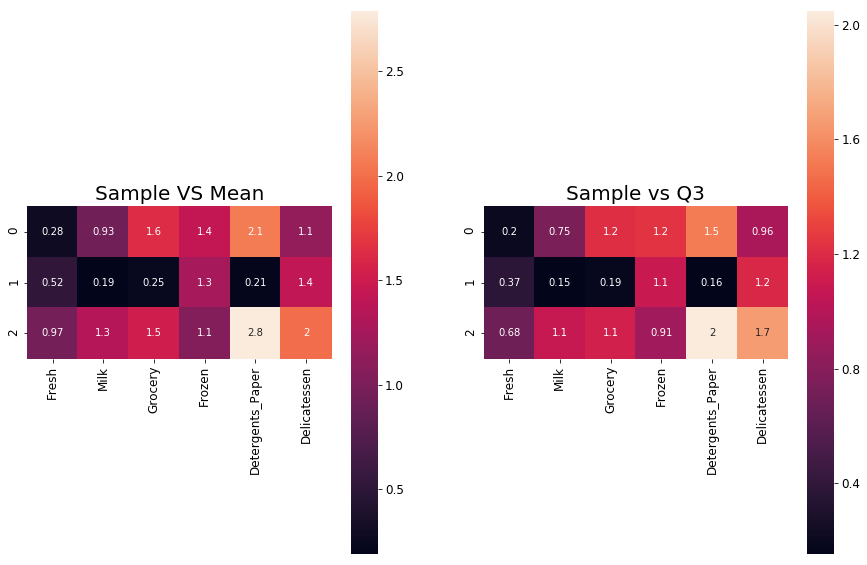

In [6]:
# Saving some statistics for each feature: 
mean_of_features = data.describe().iloc[1,:]
q3_of_features = data.describe().iloc[-2,:]

plt.figure(figsize = (15,10))

# Plotting heatmap of samples vs mean
plt.subplot(121)
sns.heatmap(samples/mean_of_features, annot = True, 
            square = True)
plt.title("Sample VS Mean", fontsize = 20)

# Plotting heatmap of samples vs Q3
plt.subplot(122)
sns.heatmap(samples/q3_of_features, annot = True, 
            square = True)
plt.title("Sample vs Q3", fontsize = 20)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**  
- Index $10 (0)$: This sample seems to have very low demand for `Fresh` products. For every other product category, it has demand close to the mean. I would say this is a small grocery shop. 
- Index $50 (1)$: This sample seems to have fresh, frozen and delicatessen products more than the mean demand. It has a relatively low demand for `Milk`, `Grocery` and `Detergent Paper`. I would say that this is a small restaurant. 
- Index $100(2)$: This sample seems to have close to triple the demand of `Detegents_Paper` as compared to the mean demand. It also has a very high demand for `Delicatessen`. The relatively large demand in all categories indicates that this might be a supplier. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [7]:
# TODO: Make a copy of the DataFrame, using the `drop`
# function to drop the given feature
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

new_data = data.copy().drop("Delicatessen", axis = 1)

# TODO: Split the data into training and testing sets using
# the given feature as the target label
X_train, X_test, y_train, y_test = train_test_split(
    new_data, data["Delicatessen"], test_size = 0.25,
random_state = 42)

# Create a decision tree regressor and fit it to the training
# set. 
regressor = DecisionTreeRegressor(random_state = 42)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the 
# testing set.
regressor.score(X_test, y_test)

-2.254711537203931

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

### Making a `DataFrame` representing $R^2$ score for each feature

In [8]:
corr = []
for column in data.columns:
    new_data = data.copy().drop(column, axis = 1)
    
    X_train, X_test, y_train, y_test = train_test_split(
    new_data, data[column], test_size = 0.25,
random_state = 42)
    
    regressor = DecisionTreeRegressor(random_state = 42)
    
    regressor.fit(X_train, y_train)
    
    score = regressor.score(X_test, y_test)
    
    corr.append((column, score))
    
(pd.DataFrame(corr, columns = ["Feature", 
                              "Score"])).sort_values("Score") 


,Feature,Score
5,Delicatessen,-2.254712
0,Fresh,-0.385750
3,Frozen,-0.210136
1,Milk,0.156275
4,Detergents_Paper,0.271667
2,Grocery,0.681884


- __Answer:__
    - I attempted to predict the `"Delicatessen"` feature.
    - The reported prediction score was $ -2.25 $. 
    - This proves that this feature could not be fit by the other features. This means it provides a good amount of  `information gain` and is __relevant__. 
    - This contrasts with other features like `"Grocery"` which has a score of $0.68$(shown below) and is fitted well using the other features. This suggests that the other features correlate well with `"Grocery"` and thus, `"Grocery"` provides less `information gain` and is __not relevant__. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

Saving figure scatter_matrix_plot


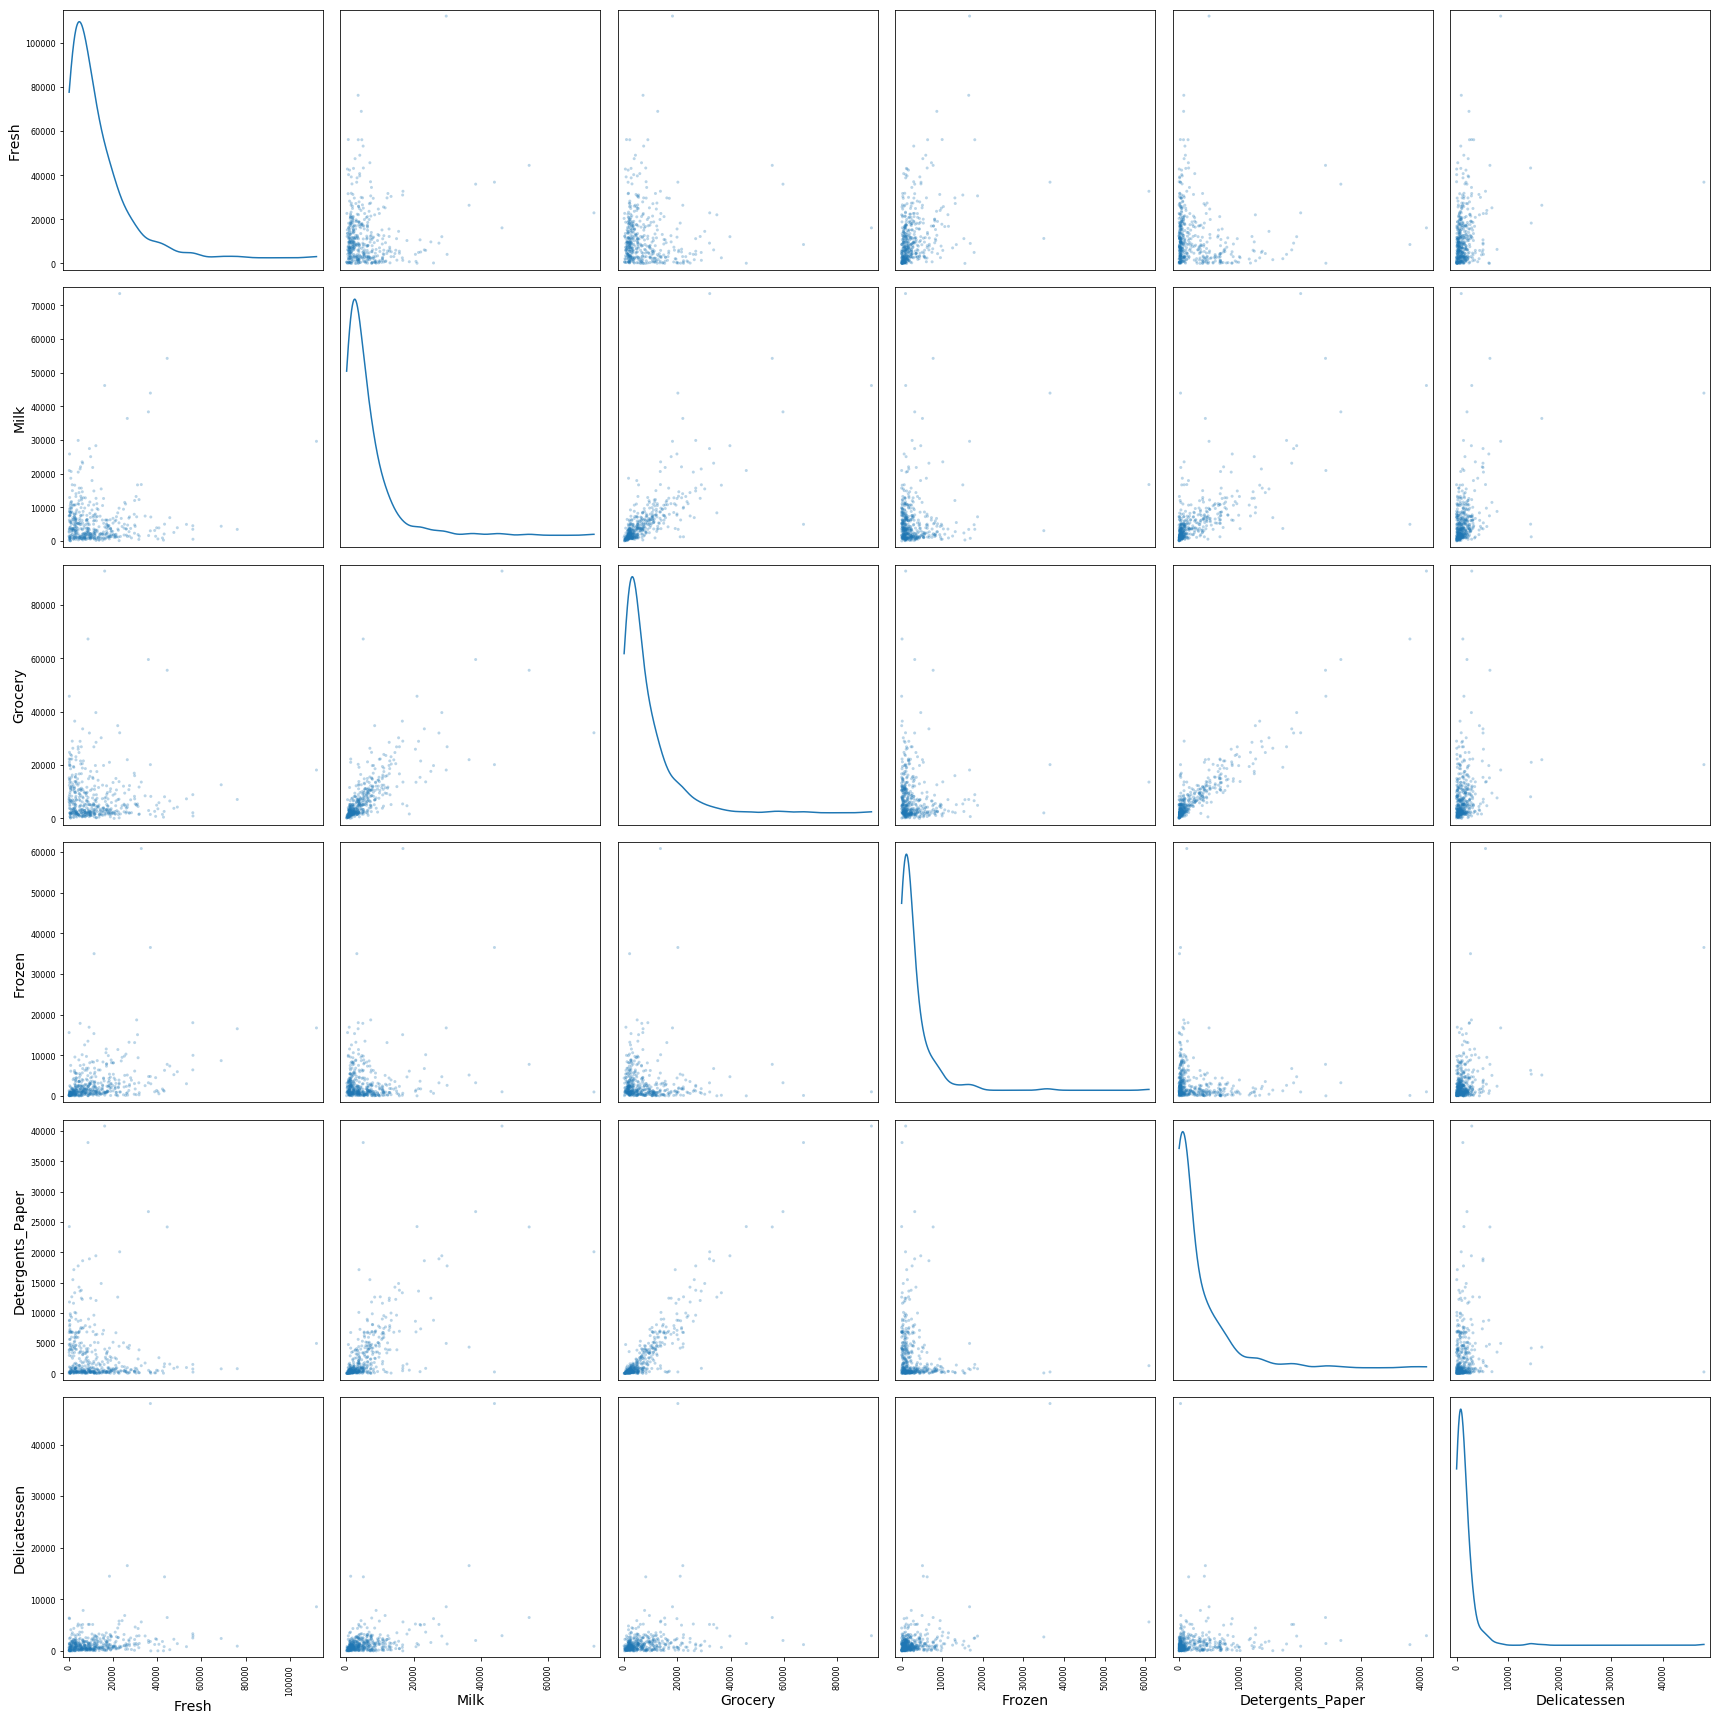

In [9]:
# Produce a scatter matrix for each pair of features in the data
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = 0.3, 
               figsize = (24,24), diagonal = 'kde');
save_fig("scatter_matrix_plot")

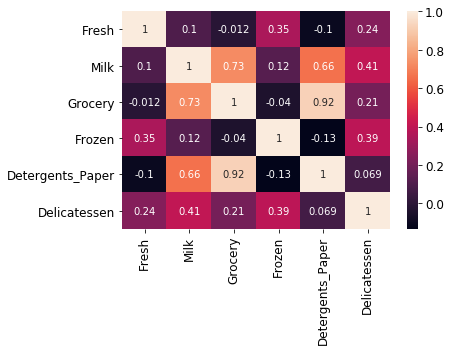

In [10]:
### Plotting the correlation matrix heatmap
sns.heatmap(data.corr(), annot = True)

__Some points to note:__  
- Customers who buy fresh products have the most correlation with customers who buy frozen products (0.34) and vice versa. 
- Customers who buy Milk have a strong positive correlation with customers who buy Grocery($0.73$) and Detergenets_Paper($0.66$).
- Customers who buy Grocery have a very strong positive correlation with customers who buy Detergents paper ($0.92$) and Milk ($0.73$), and vice versa. 
- There is either a positive correlation or no correlation between features. This proves that customers who buy more of one product category, are likely to buy more things from other product categories as well. 

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**  
- __Answer:__  
    - Yes, here are the features which seem to be correlated (positively) with each other: 
        - `Milk` and `Detergents_Paper`: $0.66$ 
        - `Grocery` and `Milk`: $0.72$ 
        - `Grocery` and `Detegents_Paper`: $0.92$ 
    - This confirms my belief that `Delicatessen` is __relevant__ to the problem as it has very weak correlation with all the other features. This means it will provide good information gain while clustering customers into segments. 
    - In general, the distribution of the points seems highly skewed towards the origin ( spending very little). This implies that smaller outlets comprise the majority of the customers in the data. 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

Saving figure log_scatter_matrix_plot


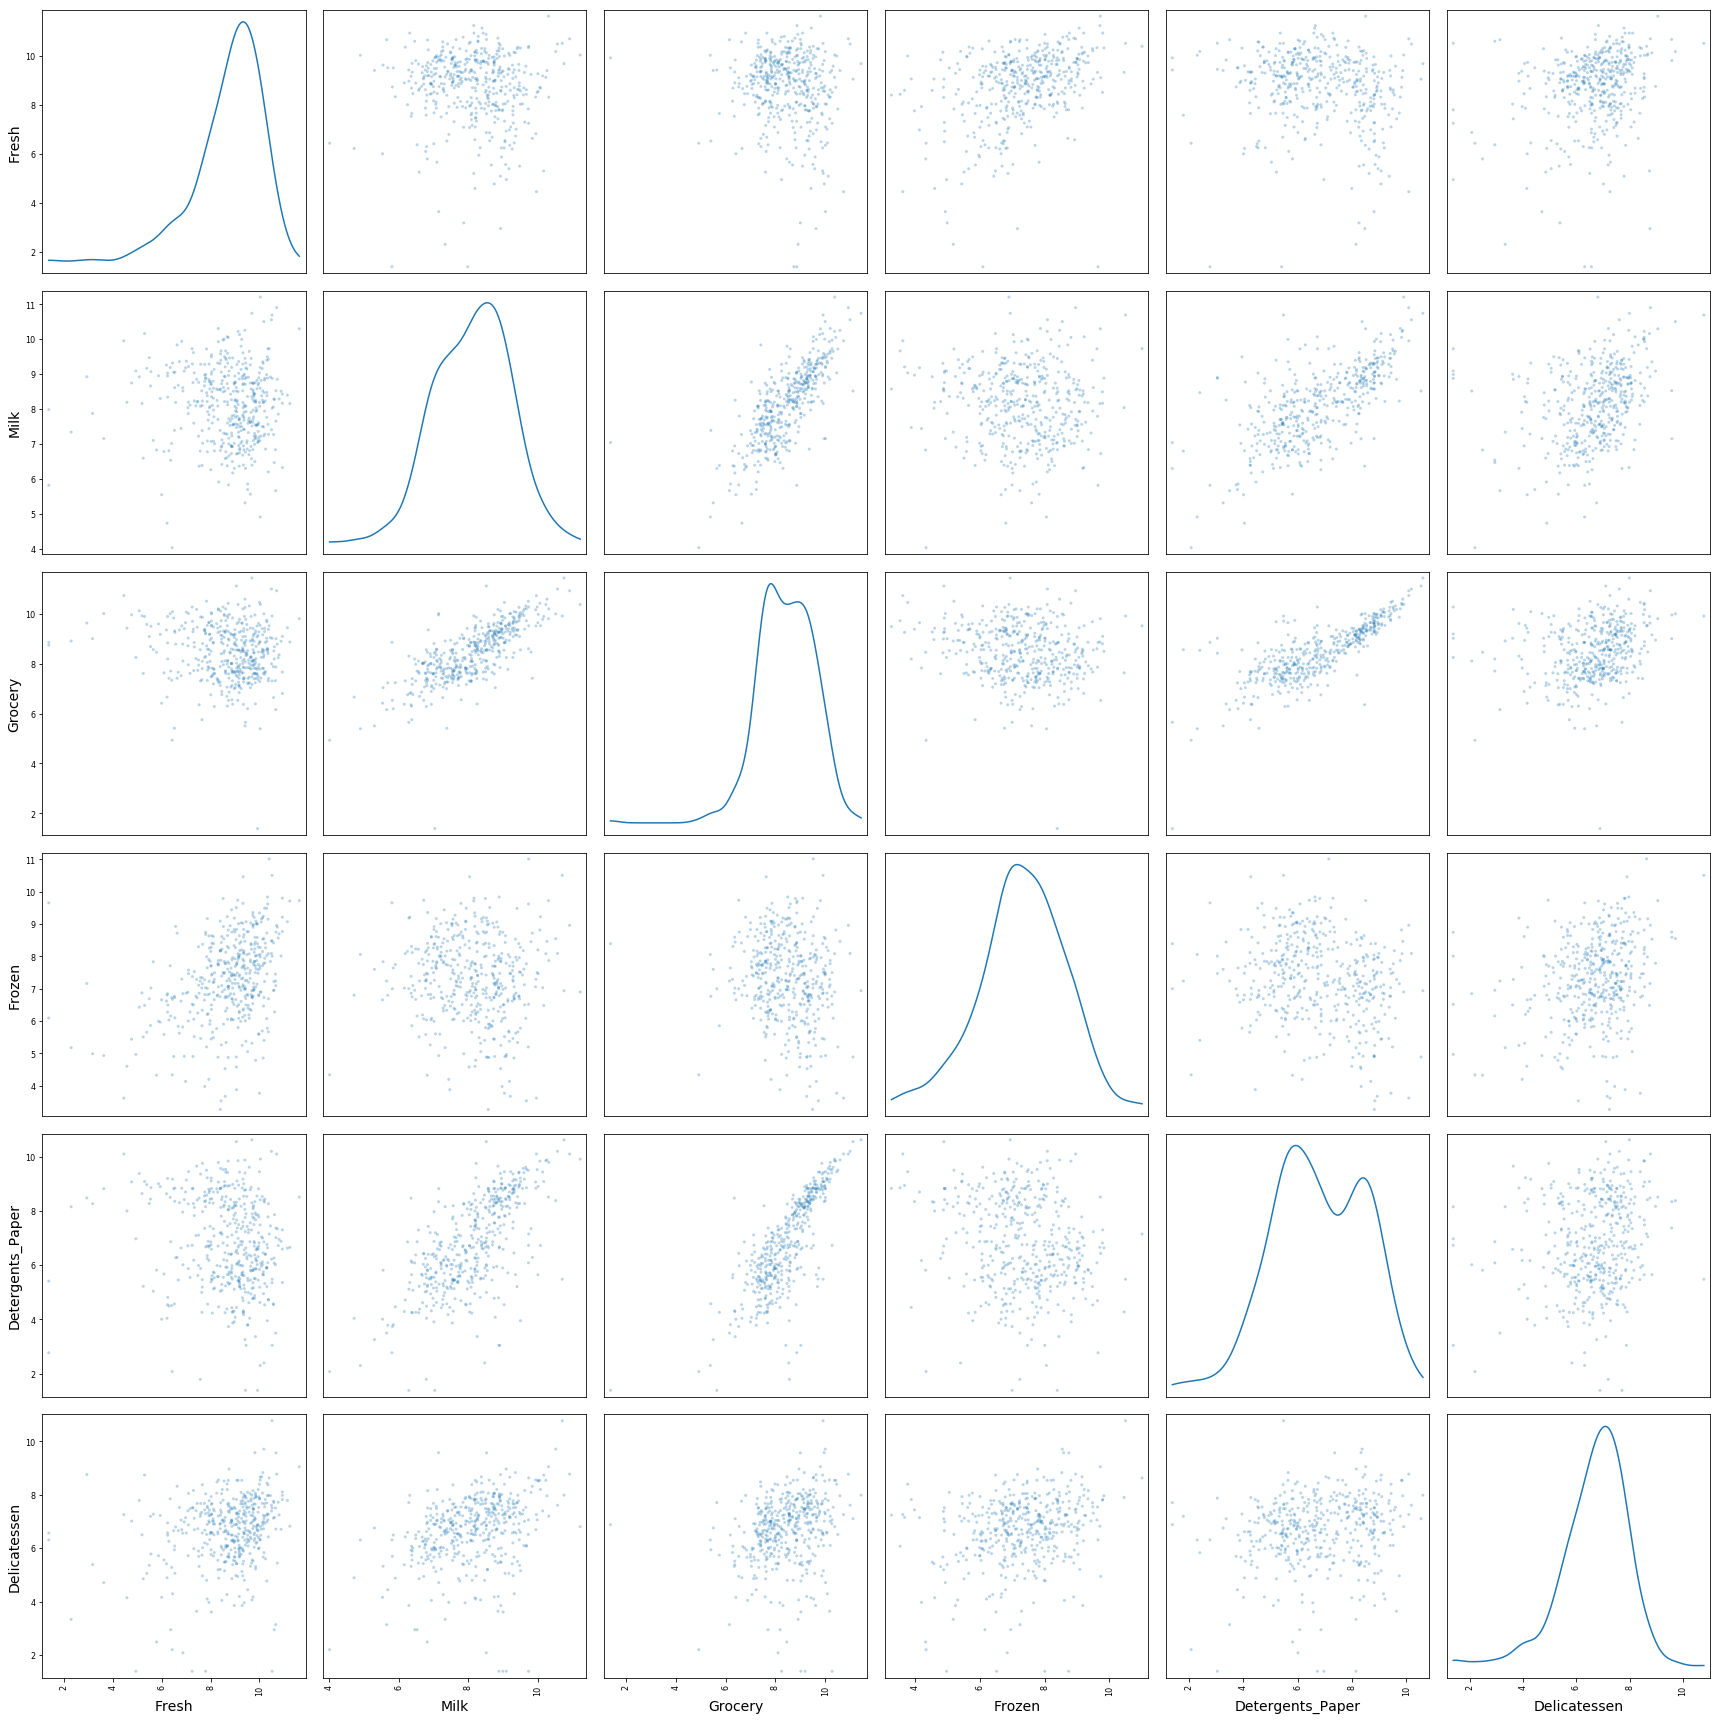

In [11]:
# TODO: Scale the data using the natural logarithm 
log_data = np.log1p(data.copy())

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log1p(samples.copy())

# Produce a scatter matrix for each pair of newly-transformed
# features
from pandas.plotting import scatter_matrix

scatter_matrix(log_data, alpha = 0.3, figsize=(24, 24), 
              diagonal = "kde")
save_fig("log_scatter_matrix_plot")

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [12]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.121777,8.594895,9.470780,8.389587,8.695841,7.464510
1,8.743532,6.999422,7.591357,8.258681,6.413459,7.679251
2,9.358329,8.959312,9.404673,8.087333,8.991687,8.016318


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [13]:
# For each feature find the data points with extreme high or 
# low values.

# OPTIONAL: Select the indices for the data points you wish
# to remove

outliers = []
multi_outliers = []

for feature in log_data.columns:
    
    # TODO: Calculate Q1 (25th percentile of the data) for 
    # the given feature
    Q1 = np.percentile(log_data[feature], q = 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for 
    # the given feature. 
    Q3 = np.percentile(log_data[feature], q = 75)
    
    # TODO: Use the interquantile range to calculate an 
    # outlier step (1.5 time the interquantile range)
    step = 1.5*(Q3 - Q1)
    
    # Display the outliers:  
    feature_outliers = log_data[~((log_data[feature]>= Q1 - step) & \
                      (log_data[feature] <= Q3 + step))]
    
    print("Data points considered outliers for the feature {}:".format(feature))
    print("Total number of outliers for the feature {}".format(
    feature), "= ", str(len(feature_outliers)))
    
    display(feature_outliers)
    
    # Retrieving list of indices of outliers for current 
    # feature. 
    outliers_index = feature_outliers.index.values.tolist()
    
    # Appending new outliers indices to list of outliers 
    for ix in outliers_index:
        if ix not in outliers:
            outliers.append(ix)
        else: 
            multi_outliers.append((feature, ix))
            
            
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature Fresh:
Total number of outliers for the feature Fresh =  16


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.454347,9.950371,10.732672,3.610918,10.095429,7.261225
66,2.302585,7.336286,8.911665,5.170484,8.151622,3.332205
81,5.393628,9.163354,9.575261,5.648974,8.964312,5.056246
95,1.386294,7.979681,8.740817,6.089045,5.411646,6.565265
96,3.178054,7.869784,9.001962,4.983607,8.262301,5.384495
128,4.948760,9.087947,8.249052,4.962845,6.968850,1.386294
171,5.303305,10.160569,9.894295,6.480045,9.079548,8.740497
193,5.198497,8.156510,9.918031,6.866933,8.633909,6.502790
218,2.944439,8.923325,9.629445,7.159292,8.475954,8.759826
304,5.087596,8.917445,10.117550,6.426488,9.374498,7.787797


Data points considered outliers for the feature Milk:
Total number of outliers for the feature Milk =  4


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.040027,11.205027,10.377078,6.895683,9.907031,6.806829
98,6.222576,4.727388,6.658011,6.797940,4.043051,4.890349
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
356,10.029547,4.905275,5.389072,8.057694,2.302585,6.308098


Data points considered outliers for the feature Grocery:
Total number of outliers for the feature Grocery =  2


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923241,7.037028,1.386294,8.391176,1.386294,6.883463
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225


Data points considered outliers for the feature Frozen:
Total number of outliers for the feature Frozen =  10


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.432071,9.663325,9.723763,3.526361,8.847504,6.073045
57,8.597482,9.203718,9.257987,3.663562,8.932345,7.156956
65,4.454347,9.950371,10.732672,3.610918,10.095429,7.261225
145,10.000614,9.034200,10.457171,3.761200,9.440817,8.396381
175,7.759614,8.967759,9.382191,3.970292,8.342125,7.437206
264,6.979145,9.177817,9.645105,4.127134,8.696343,7.143618
325,10.395681,9.728241,9.519808,11.016496,7.149132,8.632306
420,8.402231,8.569216,9.490091,3.258097,8.827468,7.239933
429,9.060447,7.467942,8.183397,3.871201,4.442651,7.824846
439,7.933080,7.437795,7.828436,4.189655,6.169611,3.970292


Data points considered outliers for the feature Detergents_Paper:
Total number of outliers for the feature Detergents_Paper =  2


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923241,7.037028,1.386294,8.391176,1.386294,6.883463
161,9.428270,6.293419,5.648974,6.996681,1.386294,7.711549


Data points considered outliers for the feature Delicatessen:
Total number of outliers for the feature Delicatessen =  14


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.302585,7.336286,8.911665,5.170484,8.151622,3.332205
109,7.249215,9.724959,10.274603,6.513230,6.729824,1.386294
128,4.948760,9.087947,8.249052,4.962845,6.968850,1.386294
137,8.035279,8.997271,9.021961,6.495266,6.582025,3.610918
142,10.519673,8.875287,9.018453,8.005033,3.044522,1.386294
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
183,10.514557,10.690831,9.912001,10.506026,5.480639,10.777789
184,5.793014,6.823286,8.457655,4.317488,5.814131,2.484907
187,7.799343,8.987572,9.192176,8.743532,8.149024,1.386294
203,6.369901,6.530878,7.703910,6.152733,6.861711,2.944439


In [14]:
# Number of outlier datapoints: 
len(outliers)

42

In [15]:
# Number of outliers in more than one feature: 
len(multi_outliers)

6

In [16]:
# Shape of good_data without outliers: 
good_data.shape

(398, 6)

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

- __Answer:__  
    - Yes, the following datapoints are considered outliers for more than one feature:
        - $154$ : `Delicatessen`, `Grocery` and `Milk` 
        - $65$  :  `Frozen` and `Fresh`
        - $75$  : `Detergents_Paper` and `Grocery`
        - $66$  : `Delicatessen` and `Fresh`
        - $128$ : `Delicatessen` and `Fresh`

In [17]:
dic = {}
for feature in log_data.columns:
    
    # TODO: Calculate Q1 (25th percentile of the data) for 
    # the given feature
    Q1 = np.percentile(log_data[feature], q = 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for 
    # the given feature. 
    Q3 = np.percentile(log_data[feature], q = 75)
    
    # TODO: Use the interquantile range to calculate an 
    # outlier step (1.5 time the interquantile range)
    step = 1.5*(Q3 - Q1)
    
    dic[feature] = {'Q1': Q1, 'Q3': Q3, "IQR": Q3 - Q1, 
                   "step" :step }
outlier_df = pd.DataFrame(dic)
outlier_df.append(log_data.iloc[[ix for feature, ix in multi_outliers[:-1]], :])

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
IQR,1.492956,2.722607,1.688745,1.565153,1.598867,1.544986
Q1,6.014321,5.551989,8.048378,6.611024,7.675081,7.335633
Q3,7.507278,8.274596,9.737123,8.176177,9.273948,8.880619
step,2.239435,4.083910,2.533117,2.347730,2.398300,2.317479
154,2.197225,2.079442,6.434547,4.330733,4.927254,4.025352
65,7.261225,10.095429,4.454347,3.610918,10.732672,9.950371
75,6.883463,1.386294,9.923241,8.391176,1.386294,7.037028
66,3.332205,8.151622,2.302585,5.170484,8.911665,7.336286
128,1.386294,6.968850,4.948760,4.962845,8.249052,9.087947


- As we can see from the above table, all the outliers lie are caused due to a feature having value well below its IQR. 
- Considering they are very different from the rest of the data, it seems reasonable to remove these datapoints else they can lead to skewed results. 
- In the presence of many outliers, clustering will often assign each outlier its own cluster or may yield distorted clusters to accommodate for the outliers. 


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

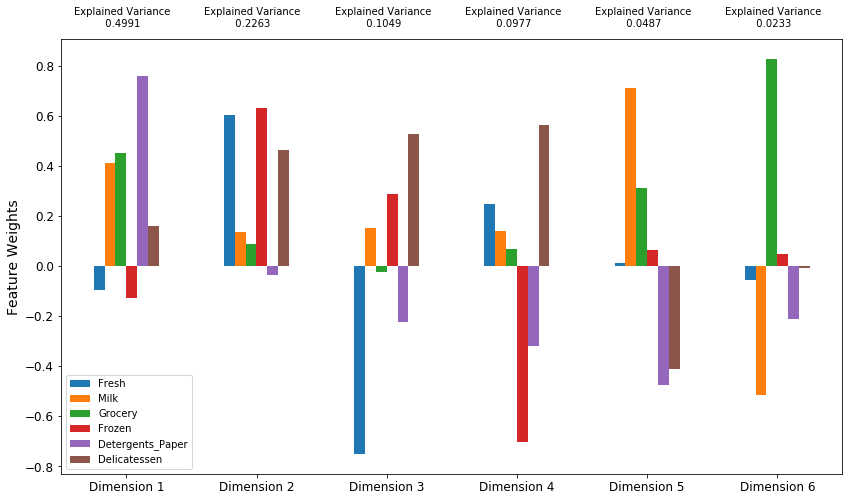

In [18]:
# TODO: Apply PCA by fitting the good data with the same
# number of dimensions as  features 
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(good_data)

# TODO: Transfotm log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot: 
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

#### Plotting the elbow curve to identify optimal number of dimensions to be used. 

Saving figure The_Elbow_Curve


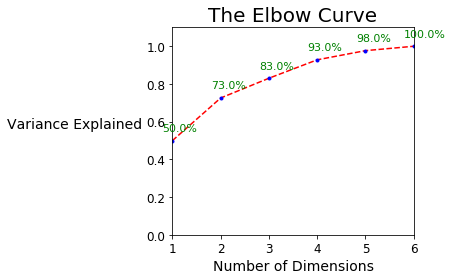

In [19]:
cumsum_variance_explained_ratio = np.cumsum(
    pca.explained_variance_ratio_)
plt.plot(np.arange(1,7),cumsum_variance_explained_ratio,
         "r--")
plt.plot(np.arange(1,7), cumsum_variance_explained_ratio,
         "b.")
plt.axis([1,6,0,1.1])
plt.xlabel("Number of Dimensions")
plt.ylabel("Variance Explained", 
           rotation = 0,ha = "right")
plt.title("The Elbow Curve", fontsize = 20)

# Plotting variance explained in percentage
for (dimension, cum_var_exp) in zip(
    np.arange(1,7), cumsum_variance_explained_ratio): 
    plt.text(dimension - 0.2, cum_var_exp + 0.05,
             str(np.round(cum_var_exp,2)*100) + "%",
             fontsize = 11, color="green", 
             label = "Feature Importance")
save_fig("The_Elbow_Curve")
plt.show()

- __Answer__: 
    - $72.5\%$ of the total variance in the `good_data` is explained by the first and second dimensions alone. 
    - The first four principal components explain $93\%$ of the variance in the `good_data`. 

- Each principal component represents different sections of customer spending: 
    - The first component provides information gain for `Milk`, `Grocery` and `Detergents_Paper`. It also provides some information about `Delicatessen`. However, it is not able to capture information from `Fresh` and `Frozen` features. This could represent a grocery shop. 
    - The second principal component makes up for the loss of information on `Fresh` and `Frozen` features. It also supplements the information on `Milk`, `Grocery` and `Delicatessen`. It also results in a very small loss of information on `Detergents_Paper`. This could represent a hotel. 
    - The third principal component gives most information about `Delicatessen` followed by `Frozen` and `Milk`. It results in a huge loss of information of `Fresh` feature and relatively small loss of information of `Grocery` and `Detergents_Paper` feature. This could actually represent a cafe. 
    - The fourth principal component like the previous component gives the most information about `Delicatessen`. It tries to make up for the loss of information of `Fresh` feature in the previous component while supplementing information about `Milk` and `Grocery`. This could represent a restaurant. 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [20]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.1753,0.5048,0.8519,-0.9793,-0.4562,0.3072
1,-1.0723,0.6014,0.7800,-0.2321,-1.1846,0.0123
2,2.5245,1.3471,0.1157,-0.2017,-0.5907,-0.0848


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [21]:
# TODO: Apply PCA by fitting the good data with only two 
# dimensions
pca = PCA(n_components = 2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above:
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced Data:
reduced_data = pd.DataFrame(reduced_data, columns = ["Dimension 1",
                                                    "Dimension 2"])
reduced_data.head()

,Dimension 1,Dimension 2
0,1.776643,-0.657581
1,1.879141,0.460687
2,1.990361,1.243668
3,-1.001044,1.367080
4,0.990457,2.076178


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [22]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.1753,0.5048
1,-1.0723,0.6014
2,2.5245,1.3471


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

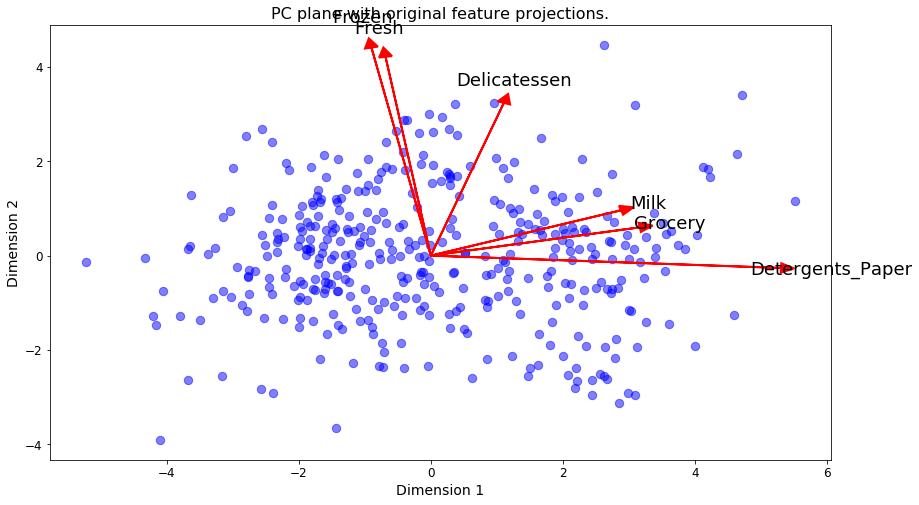

In [23]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot.      
For instance, a point on the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories.   

_From the biplot, which of the original features are the most strongly correlated with the first component?_  
- The features `"Milk"`, `"Grocery"` and `"Detergents_Paper` seem to be the most correlated with the first dimension.     

_What about those that are associated with the second component? _  
- The features `"Fresh"`, `"Frozen"` and `"Delicatessen"` seem to be the most correlated with the second dimension.   

_Do these observations agree with the PCA results plot you obtained earlier? _    

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4991,-0.0981,0.4118,0.4522,-0.1285,0.7582,0.1581
Dimension 2,0.2263,0.6018,0.1373,0.0855,0.6297,-0.0374,0.4622


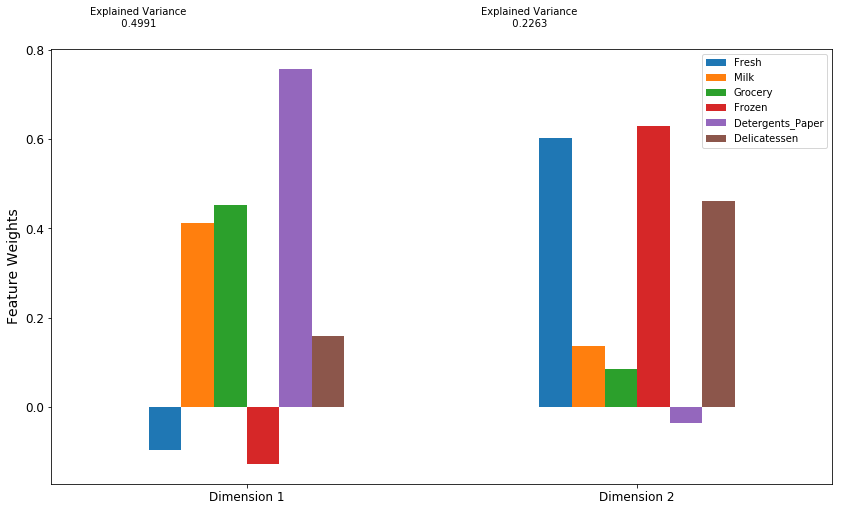

In [24]:
vs.pca_results(good_data, pca)

- When we notice carefully, the feature `"Delicatessen"` is weakly correlated with the first dimension too. 
- Further, the features, `"Milk"` and `"Grocery"` also seem to be weakly correlated with the second dimension. 
- Therefore, the observation made by the biplot is the same as that obtained by `pca_results`. 

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer**:   
- __K-Means__: 
    - _Advantages_: 
        - Smaller Run Time
        - Works well with higher dimensional data
        - Easy to interpret and implement
        - Scalable
    - _Disadvantages_: 
        - K-Means assumes clusters to be spherical, so it does not work efficiently with complex shaped data (mostly non-linear). 
        - Does hard assignments which might lead to mis-grouping. 
- __Gaussian Mixture Models__: 
    - _Advantages_: 
        - It does not assume clusters to be of any shape and therefore works well with non-linear geometric distributions as well. 
        - Does not do hard assignments which lead to mis-grouping sometimes. 
    - _Disadvantages_: 
        - Much larger runtime
        - Not Scalable
        - A little more thought goes into interpreting and implementing.
- Visualising the data above in the `biplot`, we see that there are no clear distinct clusters. Therefore, a `GaussianMixture` is preferred in this case. Moreover, the number of data points and dimensions is not large, which helps as the `GaussianMixture` is not scalable. 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

#### Setting `X` to the reduced data: 

In [25]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
X = np.array(reduced_data)
X.shape

(398, 2)

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

__Answer:__ 

In [26]:
for i in range(2,10):
    clusterer = GaussianMixture(n_components = i, random_state = 42)
    clusterer.fit(X)
    preds = clusterer.predict(X)
    score = silhouette_score(X, preds)
    print("Score with {} clusters = {}".format(i, score))

Score with 2 clusters = 0.4476665035723928
Score with 3 clusters = 0.3525182255265725
Score with 4 clusters = 0.31133974581646373
Score with 5 clusters = 0.3155374368533935
Score with 6 clusters = 0.343075184247988
Score with 7 clusters = 0.32699942783751934
Score with 8 clusters = 0.329487906411605
Score with 9 clusters = 0.25502875631892197


- Trying several clusters, we see that the score keeps going down as the number of clusters increases. Here, the best score is obtained when the number of clusters is 2. 

In [27]:
# TODO: Apply your clustering algorithm of choice to
# the reduced data 
clusterer = GaussianMixture(n_components = 2, 
                            random_state = 42)
clusterer.fit(X)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(X)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed 
# sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for 
# the number of clusters chosen
score = silhouette_score(X, preds)

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

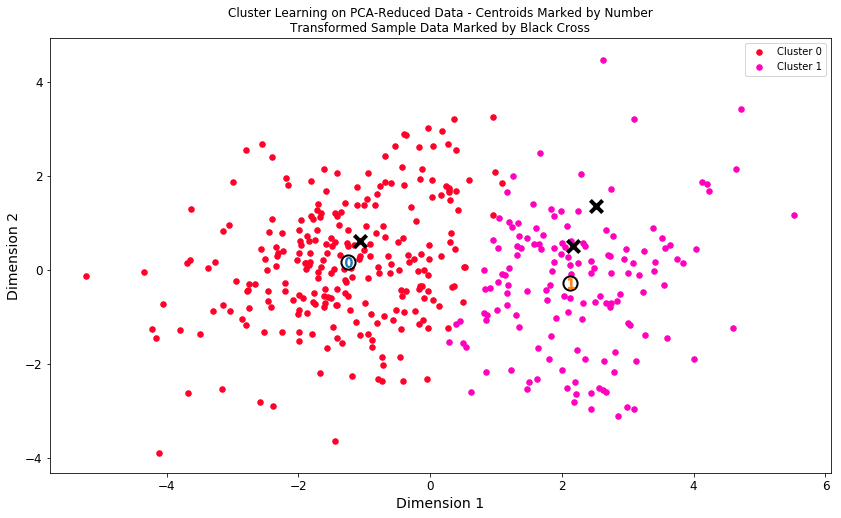

In [28]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [29]:
# TODO: Inverse transform the centers: 
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers: 
true_centers = np.exp(log_centers)

# Display the true centers: 
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9474.0,2060.0,2614.0,2199.0,343.0,798.0
Segment 1,5196.0,7759.0,11548.0,1075.0,4494.0,1105.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

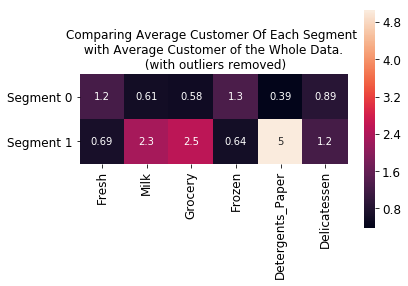

In [30]:
import seaborn as sns
sns.heatmap(true_centers/(np.exp(good_data.mean())), square = True, 
           annot = True)
plt.title("Comparing Average Customer Of Each Segment \n \
with Average Customer of the Whole Data. \n (with outliers removed)")

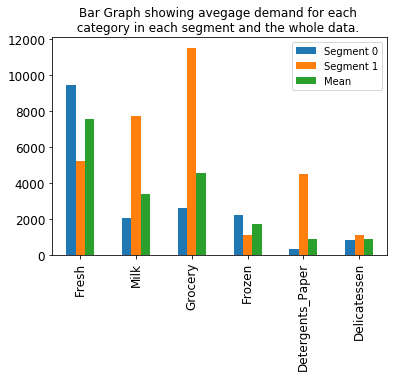

In [31]:
true_centers_with_mean = true_centers.append(
    pd.Series(np.round(np.exp(good_data.mean())), name = "Mean"))
(true_centers_with_mean.transpose()).plot.bar()
plt.title("Bar Graph showing avegage demand for each \n category in \
each segment and the whole data.  ")

In [32]:
results = true_centers_with_mean.append(
[pd.Series(true_centers.iloc[0,:]/true_centers.iloc[1,:],
name = r'$\frac{Segment0}{Segment1}$') , 
 pd.Series(true_centers.iloc[1,:]/true_centers.iloc[0,:],
          name = r'$\frac{Segment1}{Segment0}$')])    
results.transpose()

,Segment 0,Segment 1,Mean,$\frac{Segment0}{Segment1}$,$\frac{Segment1}{Segment0}$
Fresh,9474.0,5196.0,7583.0,1.823326,0.548448
Milk,2060.0,7759.0,3367.0,0.265498,3.766505
Grocery,2614.0,11548.0,4532.0,0.226360,4.417751
Frozen,2199.0,1075.0,1686.0,2.045581,0.488859
Detergents_Paper,343.0,4494.0,890.0,0.076324,13.102041
Delicatessen,798.0,1105.0,901.0,0.722172,1.384712


__Answer__:  
__`Segment 0`:__ 
- The demand for `Fresh` products in `Segment 0` is almost twice as compared `Segment 1` and is above the overall mean. 
- The demand for `Frozen` products in `Segment 0` is almost twice as compared `Segment 1` and is above the overall mean. 
- Most of the demand in `Segment 0` seems to be below the overall mean, except for `Fresh` and `Frozen` products, which exceed the mean demand by a small margin. 
- This suggests that they're relatively small establishments like _Restaurants or Local Grocery Stores._   

__`Segment 1`: __ 
- The demand for `Milk` is $3.7$ times more in `Segment 1` than in `Segment 0`, and is above the overall mean. 
- The demand for `Grocery` is $4.5$ times more in `Segment 1` than in `Segment 0`and is above the overall mean. 
- The demand for `Detergents_Paper` is $13$ times more in `Segment 1` than in `Segment 0`and is _way_ above the overall mean. 
- The demand for `Delicatessen` is $1.4$ times more in `Segment 1` as compared to `Segment 0`, and is above the overall mean. There does not seem to be much difference in the two segments when it comes to `Delicatessen`. 
- Most of the demand in `Segment 1` seems to be above the overall mean by a good margin except for `Fresh` and `Frozen` products, whose demand is below the overall mean. 
- This suggests that they're relatively large establishments like _Supermarkets, Hotels or Suppliers _. 

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [33]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print ("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


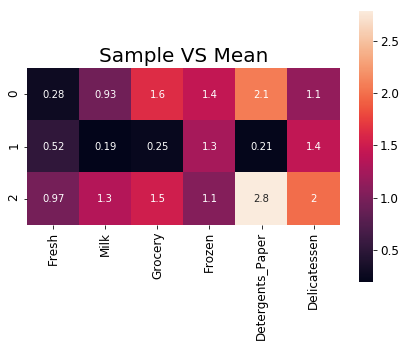

In [34]:
# Plotting heatmap of samples vs mean
plt.figure(figsize = (7,5))
sns.heatmap(samples/mean_of_features, annot = True, 
            square = True)
plt.title("Sample VS Mean", fontsize = 20)

**Answer:**  
- __Index $10 (0)$__: 
    - _My Prediction_: Small Grocery Shop
    - _Model's prediction_: Cluster 1, i.e. Supermarket/Hotel or Supplier
    - The model does not agree with my original prediction. The demand for all product categories being close to the mean indicated a relatively small establishment, but the model suggests otherwise. 
- __Index $50 (1)$__:
    - _My Prediction_: Small Restaurant
    - _Model's Prediction_: Cluster 0, Restaurant/Local Grocery Store
    - The model agrees with my initial prediction of this sample being a restaurant. 
- __Index $100(2)$__: 
    - _My Prediction_: Supplier
    - _Model's Prediction_: Cluster 1, i.e. Supermarket/Hotel or Supplier
    - The model agrees with my initial prediction of this sample being a restaurant. No surprise there, as this sample had high demand in all product categories. 


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**  
- The customers who will be most affected by the decrease in the frequency of the delivery will be the customers who buy (and then sell) a lot of `Fresh` and `Milk` products. The other product categories would not be affected too much by such a small decrease in frequency of delivery (from 5 days/week to 3 days/week).
- The demand for `Fresh` products is, on an average, twice as much in `Segment 0` as compared to `Segment 1`. 
- The demand for `Milk` products is, on an average, $3.7$ times as much in `Segment 1` as compared to `Segment 0`. 
- Therefore, I cannot choose only one of the segments that will be affected negatively (or positively).  

__How to conduct the `A/B test`: __ 
- An `A/B test` should be conducted on each of the customer segments independently by sampling statistically significant sample of customers from each cluster and reducing the delivery frequency for each of the samples. 
- Then we can have control groups with the same size and similar shopping conditions to their respective segment-samples for comparison later on.  The control groups will not receive any change in the delivery system. 
- The comparison can be done by taking a customer satisfaction survey for each of the control groups and experimental groups. 
- Once the `A/B test` is done, it can be interpreted separately for each cluster and cross-validated by changing the delivery system for some other set of customers from each cluster. 
- This data can help us make targetted decisions for certain types of customers in the future rather than generalizing an entire customer segment. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

__Answer:__ 
- I do not think a supervised learning model is needed here. 
- We can save the `PCA` transformer we used earlier after fitting it to the `good_data` (`log_data` without outliers). 
- Then, we can also save `clustered` after fitting it to the reduced two-dimensional data. 
- Then, whenever we get new samples, we can have a pipeline: 
    - Calculate new IQR and remove any new datapoints that are outliers.
    - Use _logarithmic transformation_ on the new data.
    - Reduce the data to two-dimensions using the principal components used earlier. 
    - Use `clusterer.predict()` on the new, reduced data to classify the new customers into the segments. 

_This may take more time than using a supervised learner._ 
- This is how we can use a supervised learner: 
    - Cluster the original customer data into the two segments. 
    - Make a new feature `"Customer Segment"` and assign it the value `0` for the customers belonging to segment `0` and `1` otherwise. 
    - Use `"Customer Segment"` as the target label. 
    - Train a supervised learning classifier through cross-validation on `good_data`.  
    - Whenever a new customer's product-wise annual expenditure data comes in, we can have a pipeline: 
        - Use `logarithmic transformation`
        - Use classifier to predict the customer segment the new customer belongs to. 
    

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

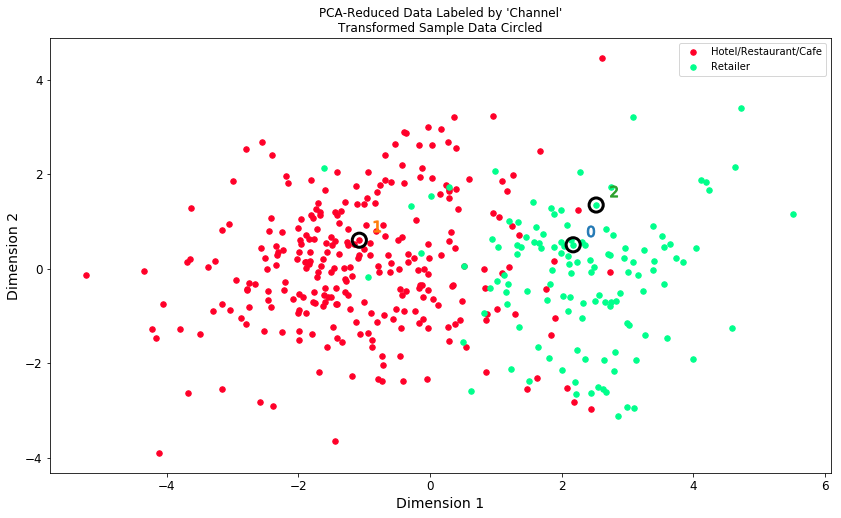

In [35]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

__How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of `Hotel/Restaurant/Cafe` customers to `Retailer customers`?__ 
- The original data shows that most of the `Cluster 0` customers represent `Hotel/Restaurants/Cafe`. On the other hand, most of the `Cluster 1` customers represent `Retailers`.    

__Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? __ 
- There are some errors, where the clusters overlap but mostly, GMM was able to cluster similar groups well.
- We can say with confidence that most of the customers with $PC1 \geq 1$ and $PC2 >= -1$  are Retailers. Similarly, most of the customers with $PC1 < 1$ are `Hotels/Restaurants/Cafe`.   

__Would you consider these classifications as consistent with your previous definition of the customer segments?__ 
- __`Cluster 0`__: 
    - _My Prediction_: `Restaurants` or `Local Grocery Stores` 
    - _Actual_: `Hotel/Restaurants/Cafe`
    - I left out `Hotels` from my predictions as I thought `Hotels` should be included in the second cluster, which has a much higher demand on average. 
- __`Cluster 1`__:
    - _My Prediction_: `Supermarkets, Hotels or Suppliers`
    - _Actual_: `Retailers`
    - `Supermarkets` and `Suppliers` can be included in `Retailers`. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.